# 1.	Research prep

## a. Define research questions

In [ ]:
#RQ1: Which customers are most likely to churn next month? 
#RQ2: If we give them a discount and assume that 10% return as customers, by how much will we increase our monthly profit?

## b.	Select analyses to answer research questions

In [ ]:
#RQ1: Use 15 Machine Learning and Deep Learning Classification models to see which is predicts churn the best for our data.
    #We'll use a random classifier, dummy classifier, logistic regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest, Gradient Boosting Classifier, ADA Boost, XG Boost, Light GBM, CatBoost, and an Artificial Neural Network.
    #We'll save most hyperparameter tuning for another day.
#RQ2: Create a bar chart to see which model produces the best predictions and highest monthly profit.

## c.	Import libraries

In [ ]:
#Measure time to execute this project
import time
start_time1 = time.time()

In [ ]:
#Mount the drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import usual Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

## d. Import data

In [ ]:
#Set my number format preference
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
#Import the data from online and then get the data from one excel sheet
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
r = requests.get(url)
open('online_retail_II.xlsx','wb').write(r.content)
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
data1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [ ]:
#Get the data from a second excel sheet
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
data2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [ ]:
#Combine the data from both excel sheets by adding rows of one to the other
#Reorder the rows ascending based on date
#Check the beginning of the data frame
df=(pd.concat([data1,data2], axis=0)).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [ ]:
#Get the number of rows and columns of the data
df.shape

(1067371, 8)

# 2. Data Cleaning

## Clean Columns

### a. Remove unnecessary columns

In [ ]:
#Get a list of the columns
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
#Drop the columns that we don't need in the analysis.
#Check the result
df=df.drop('Description', axis=1).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


### b. Rename columns as desired

In [ ]:
# Rename columns for clarity and make the changes permenant
df.rename(columns = {'InvoiceDate': 'Date', 'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID'}, inplace=True)
df.head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


### c. Check for typos in a column with text

In [ ]:
#List the values of a categorical variable column.
#Sort alphabetically
#Check for any misspellings causing duplicate category names.
df['Country'].value_counts().sort_index(ascending=True)

Australia                 1913
Austria                    938
Bahrain                    126
Belgium                   3123
Bermuda                     34
Brazil                      94
Canada                     228
Channel Islands           1664
Cyprus                    1176
Czech Republic              30
Denmark                    817
EIRE                     17866
European Community          61
Finland                   1049
France                   14330
Germany                  17624
Greece                     663
Hong Kong                  364
Iceland                    253
Israel                     371
Italy                     1534
Japan                      582
Korea                       63
Lebanon                     58
Lithuania                  189
Malta                      299
Netherlands               5140
Nigeria                     32
Norway                    1455
Poland                     535
Portugal                  2620
RSA                        169
Saudi Ar

In [ ]:
#Replace any misspelled values with the correct spellings and check the new values. Also prevent a warning from annoying you.
pd.options.mode.chained_assignment = None
df['Country'].replace(['Czech Republic'],'Czechia',inplace=True)
df['Country'].replace(['EIRE'],'Ireland',inplace=True)
df['Country'].value_counts()

United Kingdom          981330
Ireland                  17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

### d. Remove/replace null data in a column

In [ ]:
#Get the total number of null values in each column.
df.isnull().sum()

InvoiceNo          0
StockCode          0
Quantity           0
Date               0
Price              0
CustomerID    243007
Country            0
dtype: int64

In [ ]:
#Calculate the percentage of null values in each column, list descending, and format the result to two decimal places.
(df.isnull().sum()/len(df)).sort_values(ascending=False).apply('{:,.2%}'.format)

CustomerID    22.77%
InvoiceNo      0.00%
StockCode      0.00%
Quantity       0.00%
Date           0.00%
Price          0.00%
Country        0.00%
dtype: object

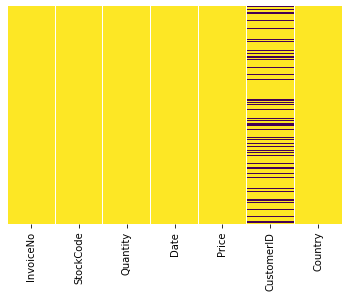

In [ ]:
#See where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis_r');

In [ ]:
#Remove all rows with null values. 
#Check the result.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [ ]:
#See the number of rows and columns we have now.
df.shape

(824364, 7)

### e. Reformat column data types as needed

In [ ]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   InvoiceNo   824364 non-null  object        
 1   StockCode   824364 non-null  object        
 2   Quantity    824364 non-null  int64         
 3   Date        824364 non-null  datetime64[ns]
 4   Price       824364 non-null  float64       
 5   CustomerID  824364 non-null  float64       
 6   Country     824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 50.3+ MB


In [ ]:
#Change a column's data type and check to see that it changed.
df = df.astype({"CustomerID": 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   InvoiceNo   824364 non-null  object        
 1   StockCode   824364 non-null  object        
 2   Quantity    824364 non-null  int64         
 3   Date        824364 non-null  datetime64[ns]
 4   Price       824364 non-null  float64       
 5   CustomerID  824364 non-null  object        
 6   Country     824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 50.3+ MB


## Clean Rows

### a. Remove unnecessary rows for categorical variables

In [ ]:
#See the unique values in a column
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia',
       'Ireland', 'Germany', 'Portugal', 'Japan', 'Denmark',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand',
       'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada',
       'Iceland', 'Lebanon', 'Saudi Arabia', 'Czechia',
       'European Community'], dtype=object)

In [ ]:
#Remove rows for the value of a category that we do not need. 
#Keep only the rows in the data that do not include a certain categorical value in a column.
#Check the result
df=df[~df['Country'].isin(['Unspecified'])]
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia',
       'Ireland', 'Germany', 'Portugal', 'Japan', 'Denmark',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Nigeria',
       'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel',
       'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland',
       'Lebanon', 'Saudi Arabia', 'Czechia', 'European Community'],
      dtype=object)

### b. Remove unnecessary rows of numerical data

In [ ]:
#Remove rows of items that were returned that have a 'C' in the stockcode.
#See how many rows are left.
df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df.shape

(805099, 7)

In [ ]:
#Remove negative prices and negative quantities. We'll keep the initial orders.
#Keep only the rows that are greater than zero. 
#Check the resulting min and max.
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,Price
count,805028.00,805028.00
mean,13.29,3.21
std,143.68,29.21
min,1.00,0.00
25%,2.00,1.25
50%,5.00,1.95
75%,12.00,3.75
max,80995.00,10953.50


### c. Remove rows outside of target timeframe

In [ ]:
#Get the range of dates in the date column.
date_range = str(df['Date'].min()) + ' to ' + str(df['Date'].max())
date_range

'2009-12-01 07:45:00 to 2011-12-09 12:50:00'

In [ ]:
#Remove rows with dates that are before or after the dates we want to include by only specifying the dates we want to include.
df=df.loc[(df['Date'] >= '2009-12-01') & (df['Date'] <= '2011-11-30')]
df.shape

(785603, 7)

### d. Remove duplicate rows

In [ ]:
#See how many rows are duplicates of another row
df.duplicated(subset=None, keep='first').sum()

25829

In [ ]:
#See a list of all duplicate rows (including the ones you want to keep) and sort them ascending using the CustomerID column and then the date column
df[df.duplicated(subset=None, keep=False)].sort_values(['CustomerID', 'Date', 'StockCode'])

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
517905,537626,20780,12,2010-12-07 14:57:00,4.65,12347.0,Iceland
14967,537626,20780,12,2010-12-07 14:57:00,4.65,12347.0,Iceland
517906,537626,20782,6,2010-12-07 14:57:00,5.49,12347.0,Iceland
14968,537626,20782,6,2010-12-07 14:57:00,5.49,12347.0,Iceland
517902,537626,21064,6,2010-12-07 14:57:00,5.95,12347.0,Iceland
...,...,...,...,...,...,...,...
494174,578262,22952,5,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
494145,578262,84991,2,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
494140,578262,84991,2,2011-11-23 13:27:00,0.55,18283.0,United Kingdom
494134,578262,84992,1,2011-11-23 13:27:00,0.55,18283.0,United Kingdom


In [ ]:
#Remove duplicate rows and see how many rows you now have.
df.drop_duplicates(inplace=True)
df.shape

(759774, 7)

### e. Remove rows with outliers as appropriate

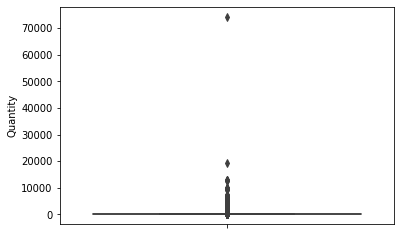

In [ ]:
#Look at a boxplot of numerical columns to identify possible outliers
sns.boxplot(y='Quantity', data=df)

In [ ]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
90857,497946,37410,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127166,501534,21099,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127168,501534,21091,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
127167,501534,21092,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark
135028,502269,21982,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135027,502269,21984,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135029,502269,21980,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
135030,502269,21981,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom


In [ ]:
#Remove an outlier row that may be a mistake and then recheck the data
df.drop(labels=61619, axis=0, inplace=True)
df.sort_values('Quantity', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
90857,497946,37410,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127169,501534,21085,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark
127167,501534,21092,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark


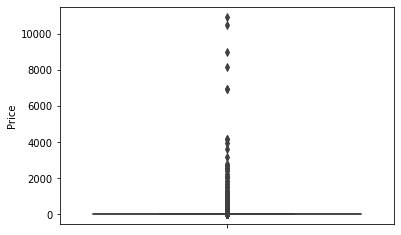

In [ ]:
#Look at a boxplot of another numerical column to identify possible outliers
sns.boxplot(y='Price', data=df)

In [ ]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Price', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
135013,502263,M,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom
358639,524159,M,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom
74356,496115,M,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom
173382,551697,POST,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
129903,501766,M,1,2010-03-19 11:35:00,6958.17,15760.0,Norway
129987,501768,M,1,2010-03-19 11:45:00,6958.17,15760.0,Norway
422374,573077,M,1,2011-10-27 14:13:00,4161.06,12536.0,France
422377,573080,M,1,2011-10-27 14:20:00,4161.06,12536.0,France
406406,571751,M,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
288706,517483,M,1,2010-07-29 12:29:00,3610.50,12737.0,France


In [ ]:
#Remove outlier rows that may be mistakes and recheck the data
df.drop(df[df['Price'] > 1000].index, axis=0, inplace = True)
df.sort_values('Price', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
51493,494042,M,1,2010-01-11 11:57:00,975.11,12510.0,Spain
455261,575607,DOT,1,2011-11-10 12:37:00,908.16,14096.0,United Kingdom
429588,573576,DOT,1,2011-10-31 14:09:00,901.58,14096.0,United Kingdom
350600,567656,DOT,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom
167667,505227,M,1,2010-04-21 10:33:00,874.84,12482.0,Sweden


In [ ]:
#Check how many rows you have now
df.shape

(759703, 7)

### f. Remove extra spaces in a column with text

In [ ]:
#Remove leading and trailing white spaces from a column with strings
df['Country'] = df['Country'].str.strip()
df

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
512921,579520,22233,2,2011-11-29 18:14:00,0.59,12748.0,United Kingdom
512922,579520,22228,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom
512923,579520,22230,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom
512925,579520,22229,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom


# 3. Feature Engineering 

## a. Combine categories within a categorical variable

In [ ]:
#List columns that are categorical (not numerical)
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'CustomerID', 'Country'], dtype='object')

In [ ]:
#For each relevant categorical variable column, look at the counts for each value to see if an infrequent category needs to be dropped or combined with another category.
#See what values are in the column and count how many are in each category.
df['Country'].value_counts()

United Kingdom          683053
Germany                  16099
Ireland                  15182
France                   13042
Netherlands               4995
Spain                     3597
Switzerland               3005
Belgium                   2960
Portugal                  2252
Australia                 1789
Channel Islands           1546
Italy                     1434
Sweden                    1316
Norway                    1145
Cyprus                    1136
Finland                    990
Austria                    915
Denmark                    740
Greece                     621
Poland                     504
Japan                      468
United Arab Emirates       383
USA                        377
Singapore                  334
Israel                     319
Malta                      281
Canada                     228
Iceland                    211
Lithuania                  154
RSA                        122
Brazil                      94
Thailand                    76
European

In [ ]:
#Get a list of the categories in the categorical variable to get ready to copy and paste what you want to combine.
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia',
       'Ireland', 'Germany', 'Portugal', 'Denmark', 'Netherlands',
       'Poland', 'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Nigeria', 'Malta', 'RSA', 'Singapore',
       'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon', 'Saudi Arabia',
       'Czechia', 'European Community'], dtype=object)

In [ ]:
#Combine the smaller categories into an 'Other' category and make the change permenant.
#Then look at the new value counts.
df['Country']=df['Country'].replace(['Netherlands', 'USA', 'Belgium', 'Australia', 'Portugal', 'Denmark', 'Poland', 'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy','Switzerland', 'Japan', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies','Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon', 'Saudi Arabia','Czechia', 'European Community'], 'Other')
df['Country'].value_counts()

United Kingdom    683053
Other              32327
Germany            16099
Ireland            15182
France             13042
Name: Country, dtype: int64

## b. Create a new date column using datetime data

In [ ]:
#Make new columns for Year and Month using a date-time column
df['Year']=df['Date'].apply(lambda date : date.year)
df['Month']=df['Date'].apply(lambda date : date.month)
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12


In [ ]:
#Look at the value counts for the new 'Year' column and sort by the index
df['Year'].value_counts().sort_index()

2009     30271
2010    381815
2011    347617
Name: Year, dtype: int64

In [ ]:
#Look at the range of dates included in the data
df['Date']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
512921   2011-11-29 18:14:00
512922   2011-11-29 18:14:00
512923   2011-11-29 18:14:00
512925   2011-11-29 18:14:00
512904   2011-11-29 18:14:00
Name: Date, Length: 759703, dtype: datetime64[ns]

In [ ]:
#Get the total number of unique products, transactions, and customers
countries=df['Country'].nunique()
customers=df['CustomerID'].nunique()
products=df['StockCode'].nunique()
orders=df['InvoiceNo'].nunique()

summary1 = [countries, customers, products, orders]
labels1 = ['Countries','Customers', 'Products', 'Orders']
uniques1 = pd.DataFrame(summary1,labels1, ['Totals']).applymap('{:,.0f}'.format)
uniques1

,Totals
Countries,5
Customers,"5,836"
Products,"4,630"
Orders,"36,041"


In [ ]:
#Calculate quantity of orders made by each customer
#Sort descending
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
n_orders.sort_values(ascending=False)

CustomerID
14911.0    385
12748.0    327
17841.0    207
15311.0    205
13089.0    199
          ... 
15731.0      1
15733.0      1
15735.0      1
15740.0      1
15739.0      1
Name: InvoiceNo, Length: 5836, dtype: int64

In [ ]:
#Calculate the percent of customers who ordered more than once.
multi_orders_percent = (np.sum(n_orders > 1) / df['CustomerID'].nunique())
print(f'{100 * multi_orders_percent:.1f}% of customers ordered more than once.')

71.6% of customers ordered more than once.


## c. Create columns by combining other columns with math

In [ ]:
#Create a revenue colummn by multiplying two columns to see total spent for that person for that transaction
df["Total Price"] = df["Quantity"] * df["Price"]
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,Total Price
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00


## d. Create columns by grouping other columns

In [ ]:
#Create a column for the cohort month and cohort quarter based on the customer's earliest purchase date
#Create a column for the order month and order quarter
#Sort by customerID and date
df['First Purchase Date']=df.groupby('CustomerID')['Date'].transform('min')
df['Last Purchase Date']=df.groupby('CustomerID')['Date'].transform('max')
df['Cohort Quarter']=df.groupby('CustomerID')['Date'].transform('min').dt.to_period('Q')
df.head(5).sort_values(['Date', 'CustomerID'])

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,Total Price,First Purchase Date,Last Purchase Date,Cohort Quarter
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.40,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.80,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4


In [ ]:
#Calculate average customer lifespan in days
#Add one day or 1 month so that our subtraction gives the full range.
df['Lifespan']=(df['Last Purchase Date']-df['First Purchase Date'])
df['Lifespan in days']=(((df['Lifespan']).dt.total_seconds()/60/60/24)+1).values
df['Lifespan in months']=(((df['Lifespan']).dt.total_seconds()/60/60/24/30.436875)+1).values

lifespan_average=(df.groupby(df['CustomerID']).agg({'Lifespan':'first'}).mean().dt.total_seconds()/60/60/24).values
lifespan_average

array([268.44945608])

In [ ]:
#Find most recent date in the transactions to use as a reference point. We'll call it refdate.
#We'll add one day to the newest date, so the most recent date in our data can get included in the analysis.
refdate = max(df.Date) + dt.timedelta(days=1) 
refdate

Timestamp('2011-11-30 18:14:00')

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,Total Price,First Purchase Date,Last Purchase Date,Cohort Quarter,Lifespan,Lifespan in days,Lifespan in months
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,83.40,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4,581 days 04:26:00,582.18,20.09
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4,581 days 04:26:00,582.18,20.09
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,81.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4,581 days 04:26:00,582.18,20.09
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,100.80,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4,581 days 04:26:00,582.18,20.09
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,30.00,2009-12-01 07:45:00,2011-07-05 12:11:00,2009Q4,581 days 04:26:00,582.18,20.09


In [ ]:
#Calculate Customer Variables
df1 = df.groupby(df['CustomerID']).agg({'Total Price': 'sum', 'Lifespan in months':'first', 'Date': lambda x: (refdate - x.max()).days, 'InvoiceNo':'nunique', 'Quantity': 'sum', 'Country':'first', 'Cohort Quarter':'first'})
df1['Customer Lifetime Revenue'] = df1['Total Price'] * df1['Lifespan in months']
df1['Profit'] = df1['Total Price'] * 0.1
df1['Customer Lifetime Profit'] = df1['Profit'] * df1['Lifespan in months']
df1['Spending per month'] = df1['Total Price'] / df1['Lifespan in months']
df1['Average Orders per month'] = df1['InvoiceNo'] / df1['Lifespan in months']
df1['Units per month'] = df1['Quantity'] / df1['Lifespan in months']
df1['Average Order Value'] = df1['Total Price'] / df1['InvoiceNo']
df1['Days since first order'] = df.groupby(df['CustomerID']).agg({'Date': lambda x: (refdate - x.min()).days})

df1.rename(columns = {'Total Price': 'Total Spent', 'InvoiceNo': 'Total Orders','Quantity': 'Total Units', 'Date':'Days since last order'}, inplace=True)
df1.sort_values(by='Customer Lifetime Revenue', ascending=False)

,Total Spent,Lifespan in months,Days since last order,Total Orders,Total Units,Country,Cohort Quarter,Customer Lifetime Revenue,Profit,Customer Lifetime Profit,Spending per month,Average Orders per month,Units per month,Average Order Value,Days since first order
CustomerID,,,,,,,,,,,,,,,
18102.0,569501.50,24.89,2,142,178947,United Kingdom,2009Q4,14175071.66,56950.15,1417507.17,22880.45,5.71,7189.42,4010.57,729
14646.0,516874.50,24.68,7,148,359235,Other,2009Q4,12756709.27,51687.45,1275670.93,20942.65,6.00,14555.43,3492.40,728
14156.0,305045.41,24.49,14,151,163967,Ireland,2009Q4,7470210.21,30504.54,747021.02,12456.50,6.17,6695.58,2020.17,729
14911.0,280233.62,24.89,2,385,143791,Ireland,2009Q4,6973702.80,28023.36,697370.28,11261.00,15.47,5778.15,727.88,729
13694.0,192509.53,24.32,16,140,185761,United Kingdom,2009Q4,4682053.09,19250.95,468205.31,7915.31,5.76,7637.84,1375.07,726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792.0,6.20,1.00,54,1,2,United Kingdom,2011Q4,6.20,0.62,0.62,6.20,1.00,2.00,6.20,54
16738.0,3.75,1.00,288,1,3,United Kingdom,2011Q1,3.75,0.38,0.38,3.75,1.00,3.00,3.75,288
13788.0,3.75,1.00,496,1,1,United Kingdom,2010Q3,3.75,0.38,0.38,3.75,1.00,1.00,3.75,496


In [ ]:
#Make labels for Churned
#We'll define Churned as someone who has not made an order in the last 30 days.
#We'll label 'Churned' with a 1.
df1['Churned'] = np.where(df1['Days since last order'] > 30, 1, 0)

#Get Churned and Retention Rates
df1['Churned'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    71.6%
0    28.4%
Name: Churned, dtype: object

In [ ]:
#Get just the Retention Rate
retention_rate=df1['Churned'].value_counts(normalize=True)
retention_rate=retention_rate[0]
retention_rate

0.2839273474982865

In [ ]:
#Add a column for Traditional Customer Lifetime Value Calculation
df1['Retention Rate'] = retention_rate
discount_rate = 0.1
df1['Traditional CLV'] = df1['Profit']*(df1['Retention Rate'] / (1 + discount_rate - retention_rate))
df1

,Total Spent,Lifespan in months,Days since last order,Total Orders,Total Units,Country,Cohort Quarter,Customer Lifetime Revenue,Profit,Customer Lifetime Profit,Spending per month,Average Orders per month,Units per month,Average Order Value,Days since first order,Churned,Retention Rate,Traditional CLV
CustomerID,,,,,,,,,,,,,,,,,,
12346.0,372.86,7.45,520,11,70,United Kingdom,2009Q4,2776.63,37.29,277.66,50.07,1.48,9.40,33.90,716,1,0.28,12.97
12347.0,4696.71,12.99,30,7,2775,Other,2010Q4,61007.49,469.67,6100.75,361.58,0.54,213.64,670.96,395,0,0.28,163.41
12348.0,2019.40,12.92,66,5,2714,Other,2010Q3,26098.53,201.94,2609.85,156.25,0.39,210.00,403.88,429,1,0.28,70.26
12349.0,4428.69,19.76,9,4,1624,Other,2010Q2,87490.41,442.87,8749.04,224.18,0.20,82.21,1107.17,580,0,0.28,154.08
12350.0,334.40,1.00,301,1,197,Other,2011Q1,334.40,33.44,33.44,334.40,1.00,197.00,334.40,301,1,0.28,11.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,2236.59,22.09,7,20,1405,United Kingdom,2010Q1,49400.93,223.66,4940.09,101.26,0.91,63.61,111.83,649,0,0.28,77.82
18284.0,461.68,1.00,422,1,494,United Kingdom,2010Q4,461.68,46.17,46.17,461.68,1.00,494.00,461.68,422,1,0.28,16.06
18285.0,427.00,1.00,651,1,145,United Kingdom,2010Q1,427.00,42.70,42.70,427.00,1.00,145.00,427.00,651,1,0.28,14.86


## e. Reorder columns

In [ ]:
#Get the column names before you reorder them
df1.columns

Index(['Total Spent', 'Lifespan in months', 'Days since last order',
       'Total Orders', 'Total Units', 'Country', 'Cohort Quarter',
       'Customer Lifetime Revenue', 'Profit', 'Customer Lifetime Profit',
       'Spending per month', 'Average Orders per month', 'Units per month',
       'Average Order Value', 'Days since first order', 'Churned',
       'Retention Rate', 'Traditional CLV'],
      dtype='object')

In [ ]:
#Reorder columns so that they look the way we like.
#Replace the original df with the new df with the new variables
df=df1[['Total Spent', 'Total Orders', 'Total Units', 'Average Order Value', 'Lifespan in months', 'Days since first order', 'Spending per month', 'Average Orders per month', 'Units per month', 
       'Customer Lifetime Revenue', 'Customer Lifetime Profit', 'Traditional CLV', 'Cohort Quarter','Country','Churned']]
df.head(2).sort_values(['CustomerID'])

,Total Spent,Total Orders,Total Units,Average Order Value,Lifespan in months,Days since first order,Spending per month,Average Orders per month,Units per month,Customer Lifetime Revenue,Customer Lifetime Profit,Traditional CLV,Cohort Quarter,Country,Churned
CustomerID,,,,,,,,,,,,,,,
12346.0,372.86,11,70,33.90,7.45,716,50.07,1.48,9.40,2776.63,277.66,12.97,2009Q4,United Kingdom,1
12347.0,4696.71,7,2775,670.96,12.99,395,361.58,0.54,213.64,61007.49,6100.75,163.41,2010Q4,Other,0


## f. Reformat column data types 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 12346.0 to 18287.0
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   Total Spent                5836 non-null   float64      
 1   Total Orders               5836 non-null   int64        
 2   Total Units                5836 non-null   int64        
 3   Average Order Value        5836 non-null   float64      
 4   Lifespan in months         5836 non-null   float64      
 5   Days since first order     5836 non-null   int64        
 6   Spending per month         5836 non-null   float64      
 7   Average Orders per month   5836 non-null   float64      
 8   Units per month            5836 non-null   float64      
 9   Customer Lifetime Revenue  5836 non-null   float64      
 10  Customer Lifetime Profit   5836 non-null   float64      
 11  Traditional CLV            5836 non-null   float64      
 12  Cohort Quarter  

In [ ]:
#Change a column's data type and check to see that it changed.
df = df.astype({"Cohort Quarter": 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 12346.0 to 18287.0
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Spent                5836 non-null   float64
 1   Total Orders               5836 non-null   int64  
 2   Total Units                5836 non-null   int64  
 3   Average Order Value        5836 non-null   float64
 4   Lifespan in months         5836 non-null   float64
 5   Days since first order     5836 non-null   int64  
 6   Spending per month         5836 non-null   float64
 7   Average Orders per month   5836 non-null   float64
 8   Units per month            5836 non-null   float64
 9   Customer Lifetime Revenue  5836 non-null   float64
 10  Customer Lifetime Profit   5836 non-null   float64
 11  Traditional CLV            5836 non-null   float64
 12  Cohort Quarter             5836 non-null   object 
 13  Country                    5836 non-null   o

# 4. Exploratory Data Analysis

## a. Get descriptive statistics

In [ ]:
df.head()

,Total Spent,Total Orders,Total Units,Average Order Value,Lifespan in months,Days since first order,Spending per month,Average Orders per month,Units per month,Customer Lifetime Revenue,Customer Lifetime Profit,Traditional CLV,Cohort Quarter,Country,Churned
CustomerID,,,,,,,,,,,,,,,
12346.0,372.86,11,70,33.90,7.45,716,50.07,1.48,9.40,2776.63,277.66,12.97,2009Q4,United Kingdom,1
12347.0,4696.71,7,2775,670.96,12.99,395,361.58,0.54,213.64,61007.49,6100.75,163.41,2010Q4,Other,0
12348.0,2019.40,5,2714,403.88,12.92,429,156.25,0.39,210.00,26098.53,2609.85,70.26,2010Q3,Other,1
12349.0,4428.69,4,1624,1107.17,19.76,580,224.18,0.20,82.21,87490.41,8749.04,154.08,2010Q2,Other,0
12350.0,334.40,1,197,334.40,1.00,301,334.40,1.00,197.00,334.40,33.44,11.63,2011Q1,Other,1


In [ ]:
#Get descriptive statistics for continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Spent,5836.00,2845.78,13941.70,2.90,337.43,846.59,2203.97,569501.50
Total Orders,5836.00,6.18,12.75,1.00,1.00,3.00,7.00,385.00
Total Units,5836.00,1734.55,8652.18,1.00,183.75,470.50,1319.50,359235.00
Average Order Value,5836.00,365.05,489.25,2.90,176.54,279.07,415.80,14844.77
Lifespan in months,5836.00,9.82,8.40,1.00,1.00,8.13,17.54,24.93
Days since first order,5836.00,467.77,221.05,1.00,312.50,524.00,659.00,729.00
Spending per month,5836.00,306.94,918.18,1.58,89.64,166.77,316.59,39906.48
Average Orders per month,5836.00,0.77,0.64,0.08,0.37,0.72,1.00,15.47
Units per month,5836.00,202.76,1428.71,0.46,44.80,93.00,183.95,87167.00
Customer Lifetime Revenue,5836.00,53329.71,333741.94,2.90,451.52,6404.15,32770.07,14175071.66


In [ ]:
#Get descriptive statistics for categorical variables
df.describe(include=['object']).T

,count,unique,top,freq
Cohort Quarter,5836,9,2010Q1,1196
Country,5836,5,United Kingdom,5321


## b. Check relationships between variables

In [ ]:
#Look at the means of all independent variables with the dependent variable
churned_stats=df.groupby('Churned').mean().T
churned_stats['Difference']=churned_stats[0]-churned_stats[1]
churned_stats

Churned,0,1,Difference
Total Spent,6351.12,1455.89,4895.23
Total Orders,12.10,3.83,8.27
Total Units,3719.87,947.36,2772.51
Average Order Value,388.65,355.69,32.97
Lifespan in months,14.79,7.85,6.94
Days since first order,433.14,481.49,-48.35
Spending per month,394.54,272.21,122.33
Average Orders per month,0.85,0.74,0.11
Units per month,233.92,190.41,43.52
Customer Lifetime Revenue,136313.65,20426.05,115887.60


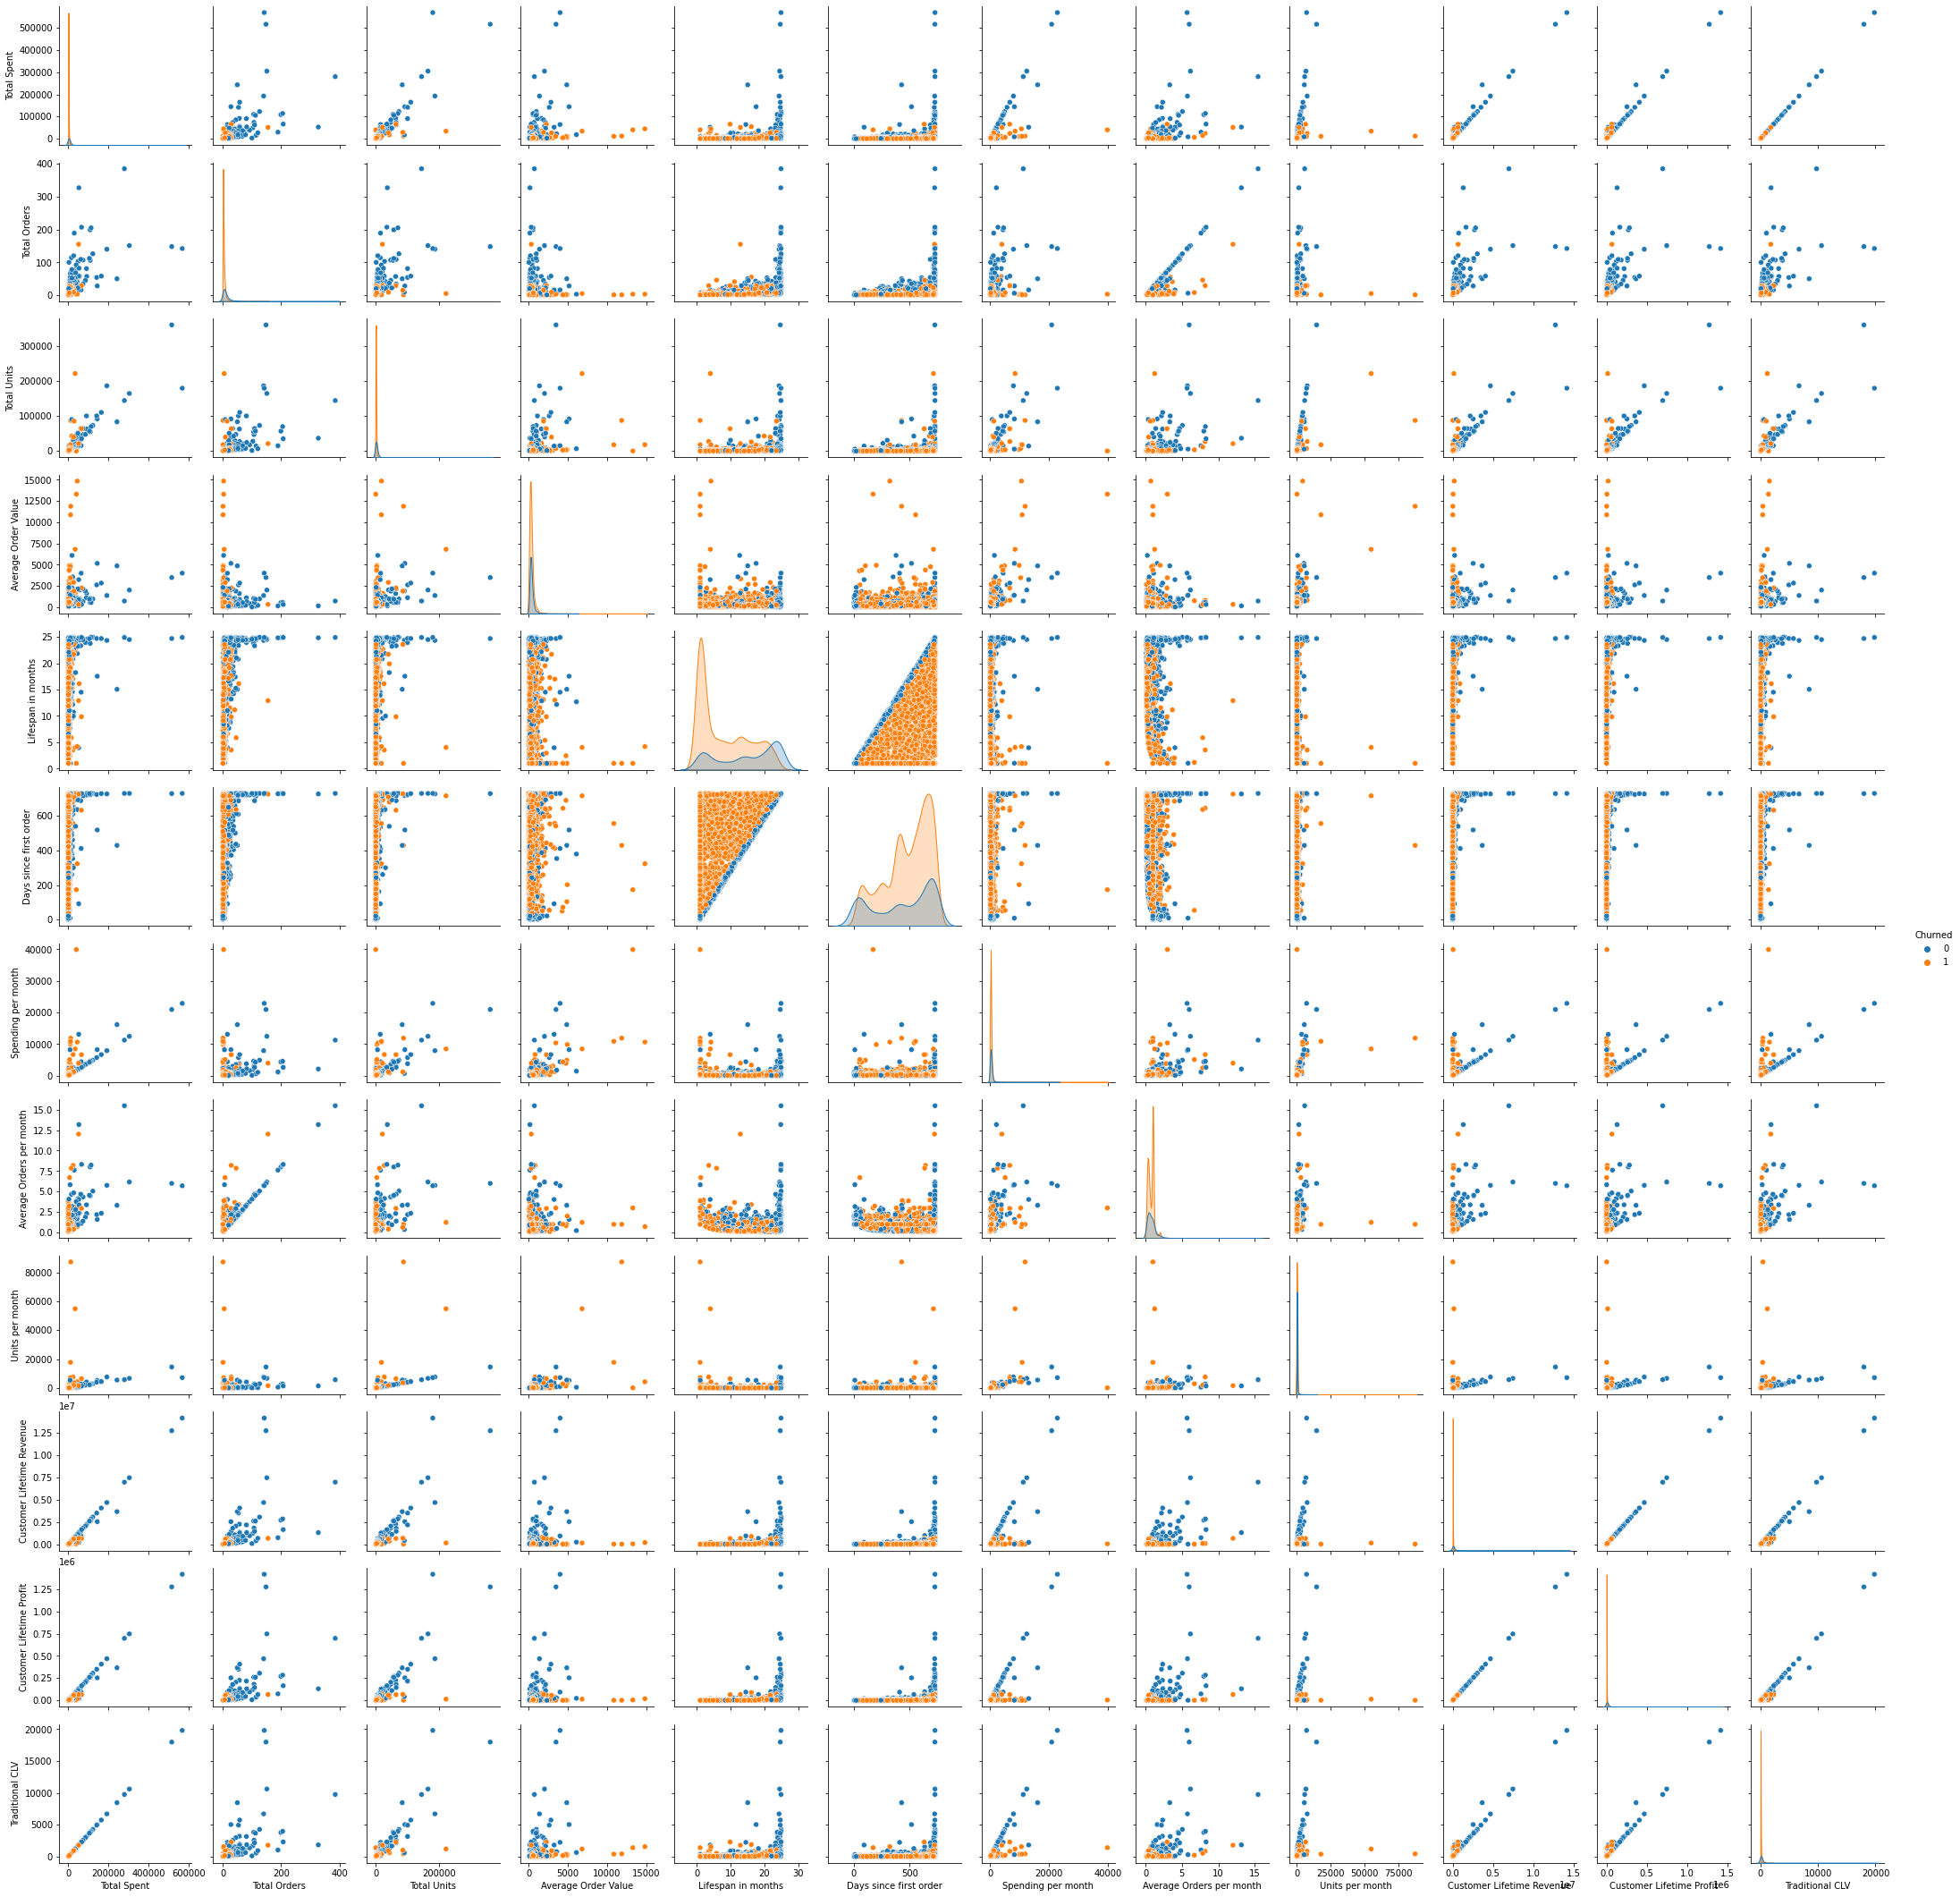

In [ ]:
sns.pairplot(df, hue='Churned')
sns.set_style('white')
sns.despine()

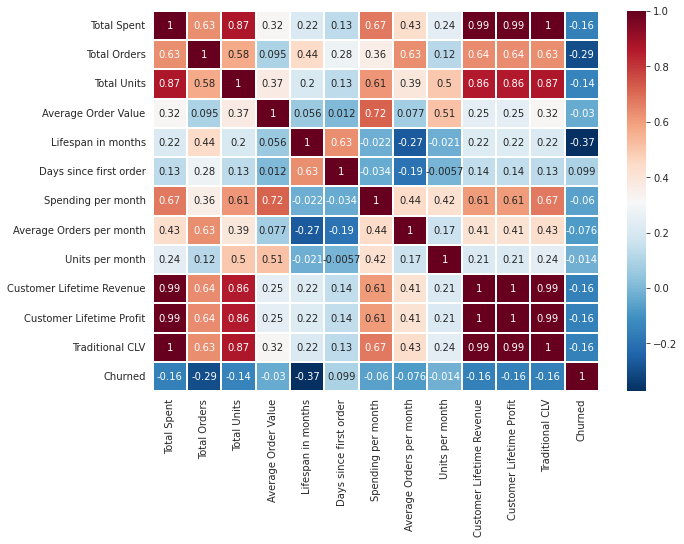

In [ ]:
#Take a look at the correlations between all columns to check for multicollinearity. 
#If the absolute value of a coefficient is greater than about 0.7, we have a potential problem if we want to use the coefficients to explain the relationship between the dependent and independent variables.
#If we just want to make predictions or forecast, multicollinearity is not usually a problem for logistic regression.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='RdBu_r', linecolor='white', linewidths=1, annot=True);

## c. Feature Reduction

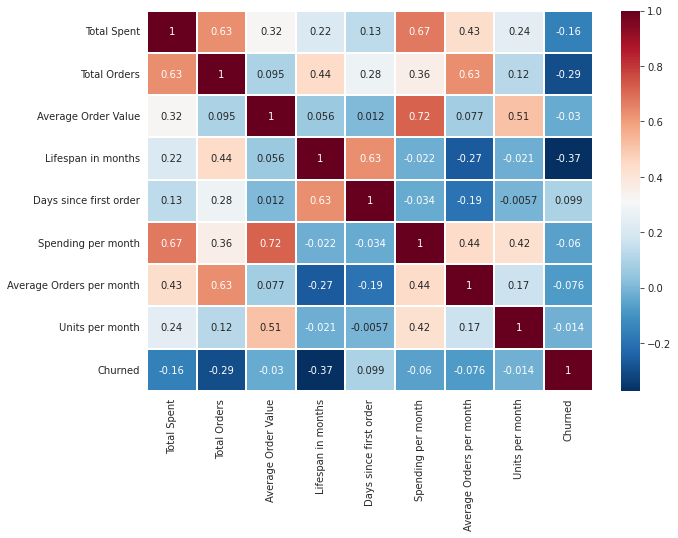

In [ ]:
#Drop any variables with high correlations that do not contribute to the model
df=df.drop(['Customer Lifetime Revenue', 'Customer Lifetime Profit', 'Traditional CLV', 'Total Units'], axis=1)

#Check the results
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='RdBu_r', linecolor='white', linewidths=1, annot=True);

## d. Split categorical variables into dummy variables

In [ ]:
#Get a list of all columns we need to change into dummy variables
for_dummies=list(df.select_dtypes(['object']).columns)
for_dummies

['Cohort Quarter', 'Country']

In [ ]:
#Create dummy variables for each value in each categorical variable column
#We'll drop the first column of the duplicate dummy variables
dummies=pd.get_dummies(df[for_dummies], drop_first=True)

#Drop the original columns you don't need now and concatenate the dummy variable columns onto the original data frame
df = pd.concat([df.drop(for_dummies, axis=1), dummies],axis=1)
df.head()

,Total Spent,Total Orders,Average Order Value,Lifespan in months,Days since first order,Spending per month,Average Orders per month,Units per month,Churned,Cohort Quarter_2010Q1,...,Cohort Quarter_2010Q3,Cohort Quarter_2010Q4,Cohort Quarter_2011Q1,Cohort Quarter_2011Q2,Cohort Quarter_2011Q3,Cohort Quarter_2011Q4,Country_Germany,Country_Ireland,Country_Other,Country_United Kingdom
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,372.86,11,33.90,7.45,716,50.07,1.48,9.40,1,0,...,0,0,0,0,0,0,0,0,0,1
12347.0,4696.71,7,670.96,12.99,395,361.58,0.54,213.64,0,0,...,0,1,0,0,0,0,0,0,1,0
12348.0,2019.40,5,403.88,12.92,429,156.25,0.39,210.00,1,0,...,1,0,0,0,0,0,0,0,1,0
12349.0,4428.69,4,1107.17,19.76,580,224.18,0.20,82.21,0,0,...,0,0,0,0,0,0,0,0,1,0
12350.0,334.40,1,334.40,1.00,301,334.40,1.00,197.00,1,0,...,0,0,1,0,0,0,0,0,1,0


# 5. Data Partitioning

## a. Split into y and x variables

In [ ]:
#Identify the dependent variable column
dep_var = 'Churned'

In [ ]:
#If we want, we can select a sample of the data to create and test the models faster before running all of the data
#df_s = df.sample(frac=0.1, random_state=101)
#df_s.shape

In [ ]:
#Import Libraries for partitioning
from sklearn.model_selection import train_test_split

In [ ]:
#Calculate how imbalanced the data are so we can decide how to partition the data.
#If the target feature occurrs frequently/infrequently, we may want to undersample/oversample it for the training set.
print("Percent with target feature:","{:.2%}".format(df[dep_var].sum() / df[dep_var].count()))

Percent with target feature: 71.61%


In [ ]:
#Add a constant so we have an intercept later for the logistic regression
import statsmodels.api as sm
df = sm.add_constant(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Split data into x variables and y variable.
#Instead of adding a list of x variable columns, we'll just drop the y variable column and use the rest of the columns for the x variables.
X=df.drop(dep_var, axis=1)
y=df[dep_var]

## b. Split data into training, validation, and test sets

In [ ]:
#Split the data into training, validation, and test sets.
#This will help us to prevent overfitting and we'll evaluate how the model can handle new information.

#Import libraries for partitioning the data
from sklearn.model_selection import train_test_split

#Select the percent of your data frame that you want in each partition
train_size= .7
validation_size= .15
test_size= .15

#Calculate ratios for the second partition
ratio_remaining = 1-test_size
ratio_val_adj = validation_size/ratio_remaining 

#Split Data into a test set and then into training and validation sets
#We'll stratify the data to ensure that the 1s and 0s for the y variable are representative of the data for each set.
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=101, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_cv, y_cv, test_size=ratio_val_adj, shuffle=True, random_state=101)

In [ ]:
#See how many rows we now have in each set
print("Original Df:",len(df))
print("Training set:",len(X_train))
print("Validation set:",len(X_val))
print("Cross-validation set:",len(X_cv))
print("Test set:",len(X_test))

#Get the percentage of a 1 in each set
print('\n') #Print a new line for readability
print("Df:","{:.2%}".format(df[dep_var].sum() / df[dep_var].count()))
print("Training Set:","{:.2%}".format(y_train.sum() / y_train.count()))
print("Validation Set:","{:.2%}".format(y_val.sum() /y_val.count()))
print("Cross-Validation Set:","{:.2%}".format(y_cv.sum() /y_cv.count()))
print("Test Set:","{:.2%}".format(y_test.sum() /y_test.count()))

Original Df: 5836
Training set: 4084
Validation set: 876
Cross-validation set: 4960
Test set: 876


Df: 71.61%
Training Set: 71.43%
Validation Set: 72.49%
Cross-Validation Set: 71.61%
Test Set: 71.58%


In [ ]:
#Check the value counts for one of the data sets
y_cv.value_counts()

1    3552
0    1408
Name: Churned, dtype: int64

# 6. Classification Models

## a. Import libraries

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 24 kB/s 


In [ ]:
#Address imbalanced data
from imblearn.over_sampling import SMOTE

#Cross-validation
from sklearn import model_selection
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, cross_val_predict, cross_val_score

#Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Pipeline, Scaler, Gridsearch
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, average_precision_score, precision_recall_curve, make_scorer
import time

## b. Prepare evaluation table

In [ ]:
#Make a blank table of evaluation metrics
results = pd.DataFrame(columns=['Model', 'True Positives', 'False Negatives','False Positives', 'True Negatives', 'Cost of False Negatives', 
                                'Benefit of True Negatives', 'Profit or Loss', 'Accuracy', 'Precision', 'Average Precision', 'Recall', 'F1', 'AUC-ROC',
                                'True Positive Rate', 'True Negative Rate', 'False Positive Rate', 'False Negative Rate', 'Processing Time'])
results

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time


In [ ]:
#Identify monetary assumptions.
#Assume that 10% of churned customers return if given a discount, the discount offered is $100, and 50% of misclassified active users also use the discount.
percent_who_return=0.10
discount_offered=100
percent_active_using_discount=0.5

#Identify counts for total active and total churned for the entire dataset
active_class = (df[dep_var].count()-df[dep_var].sum())
churned_class = df[dep_var].count()

#Create a variable for the average revenue lost per person who churns
rev_lost_per_churn = churned_stats.loc['Spending per month', 1]
print('Average monthly revenue lost per customer who churns:', "{:.2f}".format(rev_lost_per_churn))

#Create a variable for the cost of mistakenly offering a discount to active people
rev_lost_per_act_error = 100
print('Average monthly revenue lost per active customer misclassified as churned:', "{:.2f}".format(rev_lost_per_act_error))

Average monthly revenue lost per customer who churns: 272.21
Average monthly revenue lost per active customer misclassified as churned: 100.00


## c. Test each classifier

### 1. Random Classifier

In [ ]:
#Use a random classifier that gives each class an equal probability of being chosen.
#Calculate the time it takes to run the model
start_time = time.time()

#Intantiate the model and fit it to the data
model = DummyClassifier(strategy = 'uniform', random_state = 101)
model.fit(X_train, y_train)

DummyClassifier(random_state=101, strategy='uniform')

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=model.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[119 130]
 [310 317]]


              precision    recall  f1-score   support

           0       0.28      0.48      0.35       249
           1       0.71      0.51      0.59       627

    accuracy                           0.50       876
   macro avg       0.49      0.49      0.47       876
weighted avg       0.59      0.50      0.52       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Random Classifier', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0


### 2. Dummy Classifier

In [ ]:
#Use a dummy classifier that always guesses the majority class.
#Calculate the time it takes to run the model
start_time = time.time()

#Intantiate the model and fit it to the data
#Since churned is the majority class, we'll select 1.
model = DummyClassifier(strategy = 'constant', constant=1, random_state = 101)
model.fit(X_train, y_train)

DummyClassifier(constant=1, random_state=101, strategy='constant')

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=model.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[  0 249]
 [  0 627]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.72      1.00      0.83       627

    accuracy                           0.72       876
   macro avg       0.36      0.50      0.42       876
weighted avg       0.51      0.72      0.60       876



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Dummy Classifier', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0


### 3. Logistic Regression

In [ ]:
#Do a logistic regression with Stratified K-fold Cross-Validation.
#Prepare gridsearch to find the best hyperparameters later.

#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger 'cv' set that includes the 'train' and 'val' sets.
start_time = time.time()

#Prepare the pipeline with scaling and then the model
pipeline = imbpipeline(steps = [['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=101, max_iter=1000, verbose=0)]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
    
param_grid = {#'classifier__penalty' : ['l1', 'l2','elasticnet', 'none'],
              #'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              #'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)

grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=101)]]),
             param_grid={}, scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[235  14]
 [ 51 576]]


              precision    recall  f1-score   support

           0       0.82      0.94      0.88       249
           1       0.98      0.92      0.95       627

    accuracy                           0.93       876
   macro avg       0.90      0.93      0.91       876
weighted avg       0.93      0.93      0.93       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Logistic Regression', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05


### 4. Logistic Regression with SMOTE

In [ ]:
#We'll do a Logistic Regression with SMOTE. 
#We'll use Stratified K-fold Cross-Validation with SMOTE with each fold and use gridsearch to find the best hyperparameters later.
#(Since the churned customers are in the majority, SMOTE is not best for this situation. I include it here to use later for when that is not the case.)
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=101)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=101, max_iter=1000, verbose=0)]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Prepare to do gridsearch
param_grid = {#'classifier__penalty' : ['l1', 'l2','elasticnet', 'none'],
              #'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              #'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)

grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=101)],
                                       ['scaler', MinMaxScaler()],
                                       ['classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=101)]]),
             param_grid={}, scoring='roc_auc')

In [ ]:
#Identify the best parameters for when we do hyperparameter tuning
grid.best_params_

{}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[246   3]
 [114 513]]


              precision    recall  f1-score   support

           0       0.68      0.99      0.81       249
           1       0.99      0.82      0.90       627

    accuracy                           0.87       876
   macro avg       0.84      0.90      0.85       876
weighted avg       0.91      0.87      0.87       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Log. Reg. w/ SMOTE', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05


### 5. K-Nearest Neighbors

In [ ]:
#We'll use a KNN model.
#We'll use Stratified K-fold Cross-Validation and prepare to use gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.
#Decide which options to turn on or off using hastags on each line.

#Get the start time
start_time = time.time()

#Set up our pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                               #['scaler', StandardScaler()],
                                ['scaler', MinMaxScaler()],
                                ['classifier', KNeighborsClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Specify parameters to test
#Let's add a 2 to use a range of odd numbers
n_neighbors = list(range(1,101,2))
#leaf_size = list(range(1,50,2))

#Let's set up our grid for hyperparameter tuning
param_grid = {'classifier__n_neighbors' : n_neighbors,
             #'classifier__weights': ['uniform', 'distance'],
             #'classifier__leaf_size' : leaf_size,
             #'classifier__p': [1,2],
             #'classifier__metric':['minkowski', 'euclidean', 'manhattan']
              }
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=1, n_jobs =-1)

grid.fit(X_cv, y_cv)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', KNeighborsClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15,
                                                     17, 19, 21, 23, 25, 27, 29,
                                                     31, 33, 35, 37, 39, 41, 43,
                                                     45, 47, 49, 51, 53, 55, 57,
                                                     59, ...]},
             scoring='roc_auc', verbose=1)

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_neighbors': 11}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[234  15]
 [ 29 598]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       249
           1       0.98      0.95      0.96       627

    accuracy                           0.95       876
   macro avg       0.93      0.95      0.94       876
weighted avg       0.95      0.95      0.95       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'KNN', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82


### 6. Support Vector Machine

In [ ]:
#We'll now use a SVM model.
#Well use stratified K-fold Cross-Validation and use gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time of our analysis
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', SVC()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready for hyperparameter tuning
param_grid = {#'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              #'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10.0, 'scale', 'auto'],
              #'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
              }
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', SVC()]]),
             param_grid={}, scoring='roc_auc')

In [ ]:
#Identify the best parameters when we do hyperparameter tuning
grid.best_params_

{}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[224  25]
 [ 87 540]]


              precision    recall  f1-score   support

           0       0.72      0.90      0.80       249
           1       0.96      0.86      0.91       627

    accuracy                           0.87       876
   macro avg       0.84      0.88      0.85       876
weighted avg       0.89      0.87      0.88       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'SVM', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82


### 7. Gaussian Naive Bayes

In [ ]:
#We'll now use a Naive Bayes model.
#We'll use Stratified K-fold Cross-Validation and Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time for our analysis
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', GaussianNB()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Prepare for hyperparameter tuning
param_grid = {#'classifier__var_smoothing': np.logspace(0,-9, num=100)
              }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', GaussianNB()]]),
             param_grid={}, scoring='roc_auc')

In [ ]:
#Identify the best parameters for when we do hyperparameter tuning
grid.best_params_

{}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[ 89 160]
 [ 46 581]]


              precision    recall  f1-score   support

           0       0.66      0.36      0.46       249
           1       0.78      0.93      0.85       627

    accuracy                           0.76       876
   macro avg       0.72      0.64      0.66       876
weighted avg       0.75      0.76      0.74       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Gaussian Naive Bayes', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82


### 8. Decision Tree

In [ ]:
#We'll do a single decision tree.
#We'll use stratified K-fold Cross-Validation and Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time of our analysis
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                               # ['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', DecisionTreeClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready to do hyperparameter tuning
param_grid = {#'classifier__criterion':['gini', 'entropy'],
              #'classifier__max_depth': range(1,15,2), 
              #'classifier__min_samples_split': range(1,40,2), 
              #'classifier__min_samples_leaf': range(1,20,2), 
              #'classifier__max_features': ['int', 'float',"auto", "sqrt", "log2", 'None']
              'classifier__random_state': [101]
              }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier',
                                        DecisionTreeClassifier()]]),
             param_grid={'classifier__random_state': [101]}, scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[242   7]
 [ 23 604]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       249
           1       0.99      0.96      0.98       627

    accuracy                           0.97       876
   macro avg       0.95      0.97      0.96       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Decision Tree', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01


### 9. Random Forest

In [ ]:
#We'll now do a Random Forest.
#We'll use Stratified K-fold Cross-Validation and use Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', RandomForestClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Prepare for hyperparameter tuning
param_grid ={#'classifier__n_estimators': range(1,2000,200),
             #'classifier__max_features': ['int', 'float','auto', 'sqrt', 'log2'],
             #'classifier__criterion':['gini', 'entropy'],
             #'classifier__min_samples_leaf': range(1,20,2), 
             #'classifier__max_depth': range(1,20,2), 
             #'classifier__min_samples_split': range(2,40,2), 
             #'classifier__bootstrap': [True, False]
             'classifier__random_state': [101]
             }
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier',
                                        RandomForestClassifier()]]),
             param_grid={'classifier__random_state': [101]}, scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[218  31]
 [ 29 598]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       249
           1       0.95      0.95      0.95       627

    accuracy                           0.93       876
   macro avg       0.92      0.91      0.92       876
weighted avg       0.93      0.93      0.93       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Random Forest', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01


### 10. Gradient Boosting Classifier

In [ ]:
#We'll now use a Gradient Boosting Classifier
#We'll use Stratified K-fold Cross-Validation and use Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', GradientBoostingClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Prepare to do hyperparameter tuning
param_grid ={#'classifier__max_depth': range(3,20,2), 
             #'classifier__min_samples_split': range(1,1501,100),
             #'classifier__min_samples_leaf': range(1,100,10), 
             #'classifier__max_features': ['sqrt', 'auto', 'log2'],
             #'classifier__learning_rate': [0.05, 0.1, 0.15, 0.2],
             'classifier__n_estimators': range(50,500,100),
             #'classifier__loss': ['deviance', 'exponential'],
             'classifier__random_state': [101],
             #'classifier__subsample': [0.5, 0.6, 0.7, 1],
             #'classifier__criterion':['friedman_mse', 'squared_error', 'mae']
            }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier',
                                        GradientBoostingClassifier()]]),
             param_grid={'classifier__n_estimators': range(50, 500, 100),
                         'classifier__random_state': [101]},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_estimators': 450, 'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[240   9]
 [ 14 613]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       249
           1       0.99      0.98      0.98       627

    accuracy                           0.97       876
   macro avg       0.97      0.97      0.97       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Gradient Boosting', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01
9,Gradient Boosting,240,9,14,613,-2994.58,98255.72,95261.14,0.97,0.99,0.98,0.98,0.98,0.97,0.96,0.98,0.02,0.04,2.69


### 11. ADA Boost

In [ ]:
#We'll now do Adaptive Boosting.
#We'll use Stratified K-fold Cross-Validation and use Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', AdaBoostClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready to do hyperparameter tuning
param_grid ={#'classifier__base_estimator': [LogisticRegression(), DecisionTreeClassifier()],
             'classifier__n_estimators': range(50,500,100),
             #'classifier__learning_rate': [.0001, 0.001, 0.01, 0.1, 1],
             #'classifier__algorithm': ['SAMME', 'SAMME.R'],
             'classifier__random_state': [101]
             }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', AdaBoostClassifier()]]),
             param_grid={'classifier__n_estimators': range(50, 500, 100),
                         'classifier__random_state': [101]},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_estimators': 450, 'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[239  10]
 [ 20 607]]


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       249
           1       0.98      0.97      0.98       627

    accuracy                           0.97       876
   macro avg       0.95      0.96      0.96       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'ADA Boost', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239,10,20,607,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01


### 12. XG Boost

In [ ]:
#We'll now use Extreme Gradient Boosting.
#We'll use Stratified K-fold Cross-Validation and Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', XGBClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready for hyperparameter tuning
param_grid ={'classifier__n_estimators': range(50,500,100),
             #'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
             #'classifier__max_depth': range(3,21,3),
             #'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
             #'classifier__colsample_bytree': [0, 0.25, 0.5, 0.75, 1],
             #'classifier__reg_lambda': [0.1, 1, 10, 100],
             #'classifier__reg_alpha': [0.1, 1, 10, 100],
             }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', XGBClassifier()]]),
             param_grid={'classifier__n_estimators': range(50, 500, 100)},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_estimators': 450}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[241   8]
 [ 14 613]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       249
           1       0.99      0.98      0.98       627

    accuracy                           0.97       876
   macro avg       0.97      0.97      0.97       876
weighted avg       0.98      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'XG Boost', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239,10,20,607,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01


### 13. Light GBM

In [ ]:
#We'll now use the Light Gradient Boosting Machine.
#We'll use Stratified K-fold Cross-Validation and gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', LGBMClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready for hyperparameter tuning
param_grid ={'classifier__n_estimators': range(50,500,100),
            #'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
            #'classifier__max_depth': range(3,21,3),
            #'classifier__boosting_type': ['gbdt','dart', 'goss', 'rf'],
            #'classifier__num_leaves': range(1,35,2),
            #'classifier__min_child_samples': range(5,25,5),
            'classifier__random_state': [101], 
            #'classifier__colsample_bytree': [0, 0.25, 0.5, 0.75, 1],
            #'classifier__reg_lambda': [0.1, 1, 10, 100],
            #'classifier__reg_alpha': [0.1, 1, 10, 100],
             }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier', LGBMClassifier()]]),
             param_grid={'classifier__n_estimators': range(50, 500, 100),
                         'classifier__random_state': [101]},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_estimators': 450, 'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[238  11]
 [ 11 616]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       249
           1       0.98      0.98      0.98       627

    accuracy                           0.97       876
   macro avg       0.97      0.97      0.97       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Light GBM', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239,10,20,607,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
7,Decision Tree,242,7,23,604,-2329.12,96813.14,94484.03,0.97,0.99,0.98,0.96,0.98,0.97,0.97,0.96,0.04,0.03,0.01


### 14. CatBoost

In [ ]:
#We'll now use CatBoost
#We'll use Stratified K-fold Cross-Validation and Gridsearch to find the best hyperparameters
#Since we don't need a separate validation set for k-fold CV, we'll get to use a larger training set that includes the train and val sets.

#Get the start time
start_time = time.time()

#Set up the pipeline
pipeline = imbpipeline(steps = [#['smote', SMOTE(random_state=101)],
                                #['scaler', StandardScaler()],
                                 ['scaler', MinMaxScaler()],
                                 ['classifier', CatBoostClassifier()]])
#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#Get ready to do hyperparameter tuning
param_grid ={'classifier__n_estimators': range(50,500,100),
            #'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
            #'classifier__max_depth': range(3,21,3),
            #'classifier__num_leaves': range(1,35,2),
            #'classifier__min_child_samples': range(5,25,5),
            'classifier__random_state': [101], 
            #'classifier__reg_lambda': [0.1, 1, 10, 100],
            #'classifier__bootstrap_type':['Bayesian', 'Bernoulli', 'MVS', 'No']
             }

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=skfold, verbose=0)
grid.fit(X_cv, y_cv)

Streaming output truncated to the last 5000 lines.
211:	learn: 0.0765610	total: 1.07s	remaining: 696ms
212:	learn: 0.0760742	total: 1.07s	remaining: 691ms
213:	learn: 0.0757577	total: 1.08s	remaining: 687ms
214:	learn: 0.0752888	total: 1.1s	remaining: 688ms
215:	learn: 0.0750240	total: 1.1s	remaining: 684ms
216:	learn: 0.0747283	total: 1.11s	remaining: 678ms
217:	learn: 0.0742872	total: 1.11s	remaining: 673ms
218:	learn: 0.0739819	total: 1.11s	remaining: 667ms
219:	learn: 0.0737277	total: 1.12s	remaining: 662ms
220:	learn: 0.0732215	total: 1.12s	remaining: 656ms
221:	learn: 0.0729987	total: 1.13s	remaining: 650ms
222:	learn: 0.0725880	total: 1.13s	remaining: 645ms
223:	learn: 0.0722912	total: 1.14s	remaining: 640ms
224:	learn: 0.0720507	total: 1.15s	remaining: 638ms
225:	learn: 0.0715787	total: 1.16s	remaining: 636ms
226:	learn: 0.0712273	total: 1.17s	remaining: 635ms
227:	learn: 0.0704708	total: 1.18s	remaining: 630ms
228:	learn: 0.0701335	total: 1.18s	remaining: 624ms
229:	learn: 0.0

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[['scaler', MinMaxScaler()],
                                       ['classifier',
                                        <catboost.core.CatBoostClassifier object at 0x7f2955ce0710>]]),
             param_grid={'classifier__n_estimators': range(50, 500, 100),
                         'classifier__random_state': [101]},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'classifier__n_estimators': 350, 'classifier__random_state': 101}

In [ ]:
#Make predictions for the test set with the best parameters
y_pred=grid.predict(X_test)

#Test the predictions
print(confusion_matrix(y_test,y_pred))
print('\n')#Print a new line for reability
print(classification_report(y_test,y_pred))

[[240   9]
 [ 20 607]]


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       249
           1       0.99      0.97      0.98       627

    accuracy                           0.97       876
   macro avg       0.95      0.97      0.96       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'CatBoost', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239,10,20,607,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
13,CatBoost,240,9,20,607,-2994.58,97294.00,94299.42,0.97,0.99,0.98,0.97,0.98,0.97,0.96,0.97,0.03,0.04,1.16


### 15. Deep Learning (Artificial Neural Networks)

In [ ]:
#We'll now use an Artificial Neural Network for classification.

In [ ]:
#Get ready to install a wrapper
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier

In [ ]:
#Scale the x variables of the training set
from sklearn.preprocessing import MinMaxScaler
#Create an instance of the scaler and then fit the scalar only onto the training data
scaler = MinMaxScaler()
scaler.fit(X_train)

#Transform the training and test x variables to apply the scaler.
X_val = scaler.transform(X_val)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [ ]:
#Check the number of x variable columns we have to decide how many neurons to start with in the first layer of the network
X_train.shape[1]

21

In [ ]:
#Create the ANN

#Record the start time
start_time = time.time()

#We'll use the number of x variable columns as the input shape and starting number of input neurons.
#We'll give some parameters a default setting.
def create_model(neurons2, neurons3, neurons4, dropout_rate, weight_constraint, optimizer='adam', init_mode='uniform', activation='relu'):
  model=Sequential()
  model.add(Dense(units=(X_train.shape[1]), input_shape=((X_train.shape[1]),), activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=neurons2, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=neurons3, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=neurons4, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

#Set the random seed to reproduce our results
tf.random.set_seed(101)

#Wrap the model
model = KerasClassifier(model=create_model, verbose=1)

#Define Gridsearch parameters
#I hashtag options to use to make it easier to tune the model
batch_size = [50]
#batch_size = [10, 20, 40, 60, 80, 100]

epochs = [300]
#epochs = [10, 50, 100, 200, 300]

optimizer = ['Adam']
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

init_mode = ['uniform']
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

activation = ['relu']
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

weight_constraint = [3.0]
#weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]

dropout_rate = [0.2]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]

neurons2 = [10]
#neurons2 = range(10,20,5)

neurons3 = [10]
#neurons3 = range(5,15,5)

neurons4 = [5]
#neurons4 = range(1,10,3)

param_grid = dict(batch_size=batch_size, 
                  epochs=epochs, 
                  model__optimizer=optimizer, 
                  model__init_mode=init_mode, 
                  model__activation=activation, 
                  model__dropout_rate=dropout_rate,
                  model__weight_constraint=weight_constraint,
                  model__neurons2=neurons2,
                  model__neurons3=neurons3,
                  model__neurons4=neurons4)

#Create stratified folds
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

#We'll specify cv=10 for kfold cross-validation.
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=skfold, n_jobs=-1, scoring='roc_auc')
grid.fit(X_cv, y_cv)

Epoch 1/300
100/100 [==============================] - 1s 3ms/step - loss: 0.6599 - accuracy: 0.7129
Epoch 2/300
100/100 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.7161
Epoch 3/300
100/100 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7161
Epoch 4/300
100/100 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7274
Epoch 5/300
100/100 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8131
Epoch 6/300
100/100 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8244
Epoch 7/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8510
Epoch 8/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.8659
Epoch 9/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.8692
Epoch 10/300
100/100 [==============================] - 0s 3ms/step - loss: 0.2654 - accura

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=KerasClassifier(model=<function create_model at 0x7f2955ccbe60>),
             n_jobs=-1,
             param_grid={'batch_size': [50], 'epochs': [300],
                         'model__activation': ['relu'],
                         'model__dropout_rate': [0.2],
                         'model__init_mode': ['uniform'],
                         'model__neurons2': [10], 'model__neurons3': [10],
                         'model__neurons4': [5], 'model__optimizer': ['Adam'],
                         'model__weight_constraint': [3.0]},
             scoring='roc_auc')

In [ ]:
#Identify the best parameters
grid.best_params_

{'batch_size': 50,
 'epochs': 300,
 'model__activation': 'relu',
 'model__dropout_rate': 0.2,
 'model__init_mode': 'uniform',
 'model__neurons2': 10,
 'model__neurons3': 10,
 'model__neurons4': 5,
 'model__optimizer': 'Adam',
 'model__weight_constraint': 3.0}

In [ ]:
#Rerun the model with the best parameters

#Define Gridsearch parameters
batch_size = 50
epochs = 300
activation = 'relu'
dropout_rate = 0.2
init_mode = 'uniform'
neurons2 = 10
neurons3 = 10
neurons4 = 5
optimizer = 'Adam'
weight_constraint = 3

model=Sequential()
model.add(Dense(units=(X_train.shape[1]), input_shape=((X_train.shape[1]),), activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=neurons2, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=neurons3, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=neurons4, activation=activation, kernel_initializer=init_mode, kernel_constraint = MaxNorm(weight_constraint)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Do Early Stopping to help prevent overfitting.
#We can say to train for 500 epochs, but it will stop earlier when it's best.
from tensorflow.keras.callbacks import EarlyStopping

#We'll track validation loss and use patience to decide how many epochs to wait before stopping.
#We'll select 'min' because we want to minimize the validation loss metric.
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
model.fit(x=X_cv, y=y_cv, epochs=500, verbose=1, validation_data=(X_test, y_test), batch_size=100, callbacks=[early_stop])

Epoch 1/500
50/50 [==============================] - 1s 7ms/step - loss: 0.6774 - accuracy: 0.7117 - val_loss: 0.6505 - val_accuracy: 0.7158
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7161 - val_loss: 0.5746 - val_accuracy: 0.7158
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7161 - val_loss: 0.5409 - val_accuracy: 0.7158
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.7161 - val_loss: 0.4848 - val_accuracy: 0.7158
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7161 - val_loss: 0.4079 - val_accuracy: 0.7158
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.7161 - val_loss: 0.3599 - val_accuracy: 0.7158
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.7571 - val_loss: 0.3250 - val_accuracy: 0.8573
Epoch 8/500
5

In [ ]:
#Make and evaluate predictions
#Convert the prediction's probabilities into 1 and 0 with the cutoff point at 0.5
y_pred=(model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

28/28 [==============================] - 0s 1ms/step
[[246   3]
 [ 22 605]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       249
           1       1.00      0.96      0.98       627

    accuracy                           0.97       876
   macro avg       0.96      0.98      0.97       876
weighted avg       0.97      0.97      0.97       876



In [ ]:
#Evaluate the model
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).ravel()

#Cost of classifying active as churned (if a percent of them take the discount)
fn_cost = (fn/(tp+fn))*active_class*percent_active_using_discount*rev_lost_per_act_error

#Benefit of correct inactive classification (if the discount brings a certain percent back)
tn_benefit = (rev_lost_per_churn-discount_offered)*(tn/(fp+tn))*churned_class*percent_who_return

row = {'Model': 'Artificial Neural Network', 
       'True Positives': tp,
       'False Negatives': fn,
       'False Positives': fp, 
       'True Negatives': tn, 
       'Cost of False Negatives': "{:.2f}".format(-fn_cost),
       'Benefit of True Negatives': "{:.2f}".format(tn_benefit),
       'Profit or Loss': "{:.2f}".format(tn_benefit-fn_cost),
       'Accuracy': accuracy_score(y_test,y_pred), 
       'Precision': precision_score(y_test,y_pred), 
       'Average Precision': average_precision_score(y_test,y_pred),
       'Recall': recall_score(y_test,y_pred), 
       'F1': f1_score(y_test,y_pred),
       'AUC-ROC': roc_auc_score(y_test,y_pred), 
       'True Positive Rate': tp/(tp+fn), 
       'True Negative Rate': tn/(tn+fp),
       'False Positive Rate': fp/(tn+fp),
       'False Negative Rate': fn/(tp+fn), 
       'Processing Time': format(round((time.time() - start_time)/60,2))}
results = results.append(row, ignore_index=True)
results.sort_values(['AUC-ROC'],ascending=True)

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119,130,310,317,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.0
1,Dummy Classifier,0,249,0,627,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.0
6,Gaussian Naive Bayes,89,160,46,581,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.0
5,SVM,224,25,87,540,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246,3,114,513,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.1
8,Random Forest,218,31,29,598,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235,14,51,576,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234,15,29,598,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239,10,20,607,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
13,CatBoost,240,9,20,607,-2994.58,97294.00,94299.42,0.97,0.99,0.98,0.97,0.98,0.97,0.96,0.97,0.03,0.04,1.16


# 7. Comparison of Models

## a. Compare models in a chart 

In [ ]:
#Check the data type of each column
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      15 non-null     object 
 1   True Positives             15 non-null     object 
 2   False Negatives            15 non-null     object 
 3   False Positives            15 non-null     object 
 4   True Negatives             15 non-null     object 
 5   Cost of False Negatives    15 non-null     object 
 6   Benefit of True Negatives  15 non-null     object 
 7   Profit or Loss             15 non-null     object 
 8   Accuracy                   15 non-null     float64
 9   Precision                  15 non-null     float64
 10  Average Precision          15 non-null     float64
 11  Recall                     15 non-null     float64
 12  F1                         15 non-null     float64
 13  AUC-ROC                    15 non-null     float64
 

In [ ]:
#Change Data type to float where needed
results = results.astype({"Profit or Loss": 'float',
                "True Positives": 'float', 
                "False Negatives": 'float',
                "False Positives": 'float',
                "True Negatives": 'float',
                "Cost of False Negatives": 'float', 
                "Benefit of True Negatives": 'float',
                'Processing Time': 'float'
                })       
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      15 non-null     object 
 1   True Positives             15 non-null     float64
 2   False Negatives            15 non-null     float64
 3   False Positives            15 non-null     float64
 4   True Negatives             15 non-null     float64
 5   Cost of False Negatives    15 non-null     float64
 6   Benefit of True Negatives  15 non-null     float64
 7   Profit or Loss             15 non-null     float64
 8   Accuracy                   15 non-null     float64
 9   Precision                  15 non-null     float64
 10  Average Precision          15 non-null     float64
 11  Recall                     15 non-null     float64
 12  F1                         15 non-null     float64
 13  AUC-ROC                    15 non-null     float64
 

In [ ]:
#Reorder the results by the Profit column
results=results.sort_values(['Profit or Loss'],ascending=True)
results

,Model,True Positives,False Negatives,False Positives,True Negatives,Cost of False Negatives,Benefit of True Negatives,Profit or Loss,Accuracy,Precision,Average Precision,Recall,F1,AUC-ROC,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Processing Time
0,Random Classifier,119.00,130.00,310.00,317.00,-43255.02,50810.87,7555.85,0.50,0.71,0.71,0.51,0.59,0.49,0.48,0.51,0.49,0.52,0.00
1,Dummy Classifier,0.00,249.00,0.00,627.00,-82850.00,100499.73,17649.73,0.72,0.72,0.72,1.00,0.83,0.50,0.00,1.00,0.00,1.00,0.00
6,Gaussian Naive Bayes,89.00,160.00,46.00,581.00,-53236.95,93126.55,39889.60,0.76,0.78,0.78,0.93,0.85,0.64,0.36,0.93,0.07,0.64,0.00
5,SVM,224.00,25.00,87.00,540.00,-8318.27,86554.80,78236.52,0.87,0.96,0.92,0.86,0.91,0.88,0.90,0.86,0.14,0.10,0.12
3,Log. Reg. w/ SMOTE,246.00,3.00,114.00,513.00,-998.19,82227.06,81228.86,0.87,0.99,0.94,0.82,0.90,0.90,0.99,0.82,0.18,0.01,0.10
8,Random Forest,218.00,31.00,29.00,598.00,-10314.66,95851.42,85536.76,0.93,0.95,0.94,0.95,0.95,0.91,0.88,0.95,0.05,0.12,0.14
2,Logistic Regression,235.00,14.00,51.00,576.00,-4658.23,92325.12,87666.88,0.93,0.98,0.96,0.92,0.95,0.93,0.94,0.92,0.08,0.06,0.05
4,KNN,234.00,15.00,29.00,598.00,-4990.96,95851.42,90860.46,0.95,0.98,0.96,0.95,0.96,0.95,0.94,0.95,0.05,0.06,0.82
10,ADA Boost,239.00,10.00,20.00,607.00,-3327.31,97294.00,93966.69,0.97,0.98,0.98,0.97,0.98,0.96,0.96,0.97,0.03,0.04,1.73
13,CatBoost,240.00,9.00,20.00,607.00,-2994.58,97294.00,94299.42,0.97,0.99,0.98,0.97,0.98,0.97,0.96,0.97,0.03,0.04,1.16


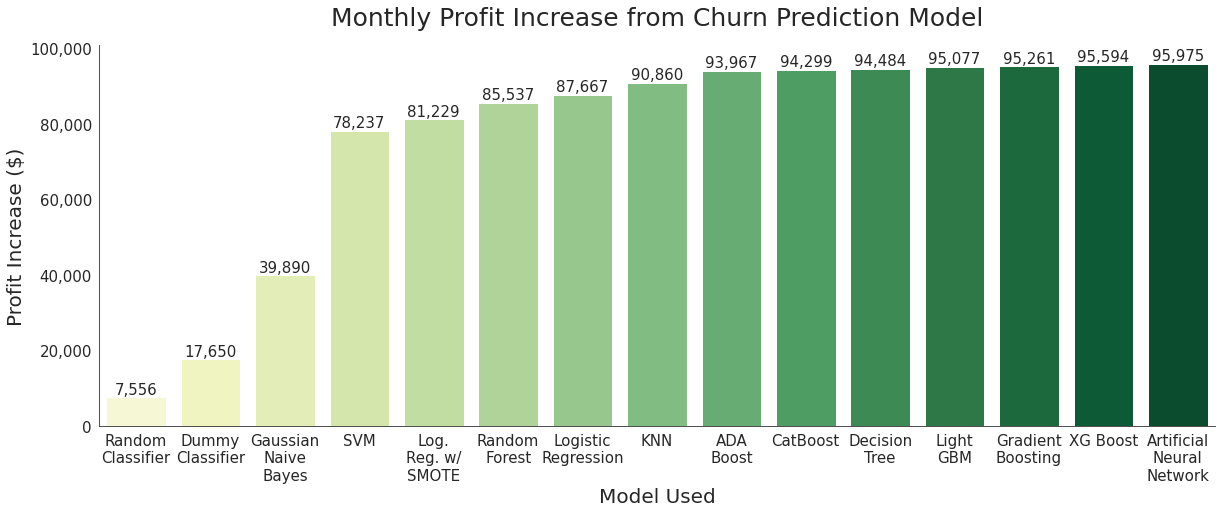

In [ ]:
#Get the axes
fig, ax = plt.subplots(figsize=(20, 7))

#Set the style
sns.set_style('white')
sns.despine()

#Plot the chart
plot=sns.barplot(data=results, x="Model", y='Profit or Loss', palette='YlGn', ax=ax)

#Set labels
plt.ylabel("Profit Increase ($)", size=20)
plt.xlabel("Model Used", size=20)
plt.title("Monthly Profit Increase from Churn Prediction Model", size=25, pad=20)
plt.tick_params(axis='both', which='major', labelsize=15)

#Wrap the text for each x axis tic.
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 8)# 

#Add labels for each bar
for bar in plot.patches:
  plot.annotate(format(bar.get_height(), ',.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
#Format the y axis numbers
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# 8. Conclusion

## a. Research Questions

In [ ]:
#RQ1: We can predict with 97% accuracy who will churn next month if we use the Deep Learning (Artificial Neural Network) Classifier.
    #We can improve accuracy if we later tune the hyperparameters of each model.
#RQ2: The monthly gross margin is forecast to increase by $95,975 if we use this classification model to predict who will churn next month, offer a discount to them, and then assume that 10% will take the offer.

## b. Save the results

In [ ]:
#Export data if we want to check it out with Excel
#y_pred.to_csv('y_pred.csv', index=True)

## c. Get the duration of the project

In [ ]:
total_time= format(round((time.time() - start_time1)/60,2))
print('Minutes: ', total_time)

Minutes:  28.82


## d. Play a sound when done

In [ ]:
#Play a sound when done
import IPython
display(IPython.display.Audio("/content/drive/MyDrive/Python/Ring08.wav", autoplay=True))